In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# import matplotlib.patches as patches
# from matplotlib.colors import to_rgba

In [2]:
df = pd.read_csv('data/GITaylor_Trinity_data.csv')

In [29]:
df['t_sec'] = df['t_msec'] * 1e-3
df['R_cm'] = df['R_m'] * 1e2

df['log_t'] = df['t_sec'].apply(lambda x: np.log(x))

In [30]:
df.head()

,t_msec,R_m,t_sec,R_cm,log_t
0,0.10,11.1,0.00010,1110.0,-9.210340
1,0.24,19.9,0.00024,1990.0,-8.334872
2,0.38,25.4,0.00038,2540.0,-7.875339
3,0.52,28.8,0.00052,2880.0,-7.561682
4,0.66,31.9,0.00066,3190.0,-7.323271


In [33]:
np.log10(df['t_sec'][0])

-4.0

In [27]:
np.log(df['t_sec'])

0    -9.210340
1    -8.334872
2    -7.875339
3    -7.561682
4    -7.323271
5    -7.130899
6    -6.969631
7    -6.830794
8    -6.708904
9    -6.600271
10   -6.502290
11   -6.406980
12   -6.325540
13   -6.250235
14   -5.726028
15   -5.646457
16   -5.572754
17   -5.504112
18   -5.439881
19   -5.379527
20   -4.199705
21   -3.688879
22   -3.381395
23   -2.937463
24   -2.780621
Name: t_sec, dtype: float64

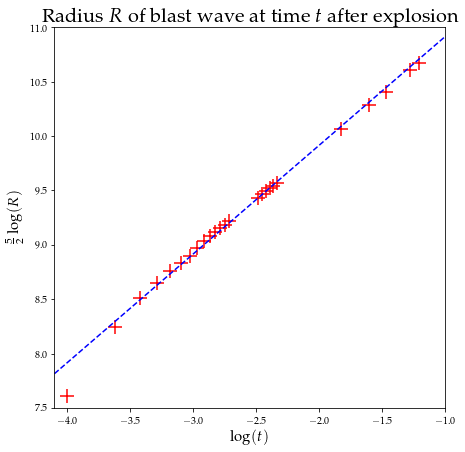

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title('Radius $R$ of blast wave at time $t$ after explosion', fontsize=20)
ax.scatter(np.log10(df['t_sec'].values), 5/2 * np.log10(df['R_cm'].values), s=180, marker='+', color='r')
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, logt + 11.915, 'b--')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t)$', fontsize=15)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=15);